# Outils informatiques/méthodes numériques avancées  pour la mécanique
# cours MGC2367M
# Dpt de mécanique UCB Lyon 1

## [Documents sur le cours](/cours_html/MGC2367M)

## [Aide à la programmation avec Ollama](/cours_html/MGC2367M/#ia-generative)

## [Consignes à lire attentivement](/cours_html/MGC2367M/consignes.html)

A la fin de votre session, pensez bien à vous déconnecter (bouton en haut à gauche **se déconnecter**)

**Ecrire votre nom , prénom et numéro d'étudiant (nombre entier) ci-dessous**

In [1]:
NOM = "MOUHALHAL"
PRENOM="MOUSSAAB"
NUMERO_ETUDIANT = 12408113

# TP Pandas: traitement de données météo

![python_pandas](python_pandas.jpg)

In [2]:
%matplotlib inline
# bibliotheques de base
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from validation.validation import check_function,liste_functions,info_etudiant
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
# test si numero étudiant spécifier
try: NUMERO_ETUDIANT
except NameError: NUMERO_ETUDIANT = None 
if type(NUMERO_ETUDIANT) is not int :
    NOM, PRENOM, NUMERO_ETUDIANT = info_etudiant()
printmd("**Etudiant** {} {}  id={}".format(NOM,PRENOM,NUMERO_ETUDIANT))
# année
_num_ = str(NUMERO_ETUDIANT)
_an_ = (int(_num_[-2]) + int(_num_[-1]))%10 + 2010
_ville_ = chr(int(_num_[-4]) + int(_num_[-3]) + ord('A'))
printmd("**Annee {} et Ville commençant par {}**".format(_an_,_ville_))

**Etudiant** MOUHALHAL MOUSSAAB  id=12408113

**Annee 2014 et Ville commençant par J**

## Objectif
On se propose à travers ce projet de realiser des statistiques sur des relevès d’une
station meteo lors d’une annee. Nous utiliserons pour cela la bibliothèque **PANDAS**
de Python. 

Dans un premier temps, vous devez télécharger le fichier de données SYNOP sur le site :

- [https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/table/](https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/table/)

La documentation sur le format de ces données est ici

- https://donneespubliques.meteofrance.fr/client/document/doc_parametres_synop_168.pdf

Pour choisir le fichier, vous considérerez l’année donnée ci-dessus et une ville commençant par la lettre affichée.

Si la lettre ou l’année n’a pas de données, considérez l’année la plus proche et la lettre la plus proche.

## Lecture des données (attention format)

lire le fichier de données et le transformer en dataframe **data1** (attention le séparateur utiliser dans le fichier est un ";").
On affichera l'information du dataframe avec la fonction info()

In [3]:
#JUAN DE NOVA 2014 (hauteur de neige = que des NAN)
#j'ai pris AJACCIO 2014
data1=pd.read_csv('AJACCIO.csv',sep=';')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 82 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   ID OMM station                                             2915 non-null   int64  
 1   Date                                                       2915 non-null   object 
 2   Pression au niveau mer                                     2914 non-null   float64
 3   Variation de pression en 3 heures                          2914 non-null   float64
 4   Type de tendance barométrique                              2914 non-null   float64
 5   Direction du vent moyen 10 mn                              2915 non-null   int64  
 6   Vitesse du vent moyen 10 mn                                2915 non-null   float64
 7   Température                                                2914 non-null   float64
 8   Point de

In [4]:
# ne pas modifier

### Selection des données utiles
A partir du fichier .csv, nous nous interesserons aux donnees suivantes : temperature,
hauteur de neige fraiche, precipitations dans la derniere heure, direction du vent moyen
10 mn et vitesse du vent moyen 10 mn.

A partir du dataframe précédent, créer un dataframe **data** contenant uniquement les données utiles. Affichez l'information du dataframe avec la fonction info()

In [5]:
data=data1[['Date','Température', 'Hauteur de la neige fraîche', 'Précipitations dans la dernière heure', 'Direction du vent moyen 10 mn', 'Vitesse du vent moyen 10 mn']].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   2915 non-null   object 
 1   Température                            2914 non-null   float64
 2   Hauteur de la neige fraîche            1153 non-null   float64
 3   Précipitations dans la dernière heure  2913 non-null   float64
 4   Direction du vent moyen 10 mn          2915 non-null   int64  
 5   Vitesse du vent moyen 10 mn            2915 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 136.8+ KB


In [6]:
# ne pas modifier

### renommage des colonnes
Pour simplifier la programmation, renommer les colonnes en utilisant les noms suivants:

      ['date','temp','neige','pluie','dir','vent']

In [7]:
data.rename(columns ={'Date':'date','Température':'temp', 'Hauteur de la neige fraîche':'neige' , 'Précipitations dans la dernière heure' : 'pluie' , 'Direction du vent moyen 10 mn' : 'dir', 'Vitesse du vent moyen 10 mn' : 'vent'}, inplace=True)
data.head()

,date,temp,neige,pluie,dir,vent
0,2014-02-28T22:00:00+01:00,281.75,NaN,0.6,330,1.0
1,2014-05-20T11:00:00+02:00,293.85,NaN,0.0,230,2.1
2,2014-03-12T04:00:00+01:00,278.85,NaN,0.0,50,3.1
3,2014-05-20T02:00:00+02:00,288.15,NaN,0.0,40,1.5
4,2014-09-29T08:00:00+02:00,286.85,0.0,0.0,40,3.1


In [8]:
# ne pas modifier

### conversion des dates

convertir la colonne date qui contient des dates sous forme de chaine de caractères en type datetime python en utilisant la fonction **to_datetime**

In [9]:
data['date']=pd.to_datetime(data['date'],utc=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    2915 non-null   datetime64[ns, UTC]
 1   temp    2914 non-null   float64            
 2   neige   1153 non-null   float64            
 3   pluie   2913 non-null   float64            
 4   dir     2915 non-null   int64              
 5   vent    2915 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 136.8 KB


In [10]:
# ne pas modifier

### indexation par la date

Apres la conversion, indexer **data** avec cette colonne date pour avoir les donnéees en fonction de la date

In [11]:
data.set_index('date',inplace=True)

In [12]:
# ne pas modifier

### prise en compte de la localisation
pour convertir les dates avec la bonne localisation, executer le code suivant

In [13]:
# inutile dans la version actuelle
#data=data.tz_localize('Europe/Paris')
data.head()

,temp,neige,pluie,dir,vent
date,,,,,
2014-02-28 21:00:00+00:00,281.75,NaN,0.6,330,1.0
2014-05-20 09:00:00+00:00,293.85,NaN,0.0,230,2.1
2014-03-12 03:00:00+00:00,278.85,NaN,0.0,50,3.1
2014-05-20 00:00:00+00:00,288.15,NaN,0.0,40,1.5
2014-09-29 06:00:00+00:00,286.85,0.0,0.0,40,3.1


### conversion temperature en °C

Convertir la colonne temp en °Celsius

In [14]:
for i in range (len(data['temp'])) :
    data.iloc[i,0]-=273.15

In [15]:
# ne pas modifier

### Trace des données
tracer les graphes de la température, hauteur d'eau et de neige et vitesse du vent en fonction de la date.

hauteur d’eau max=19.0 mm (2014-07-13 00:00:00+00:00)


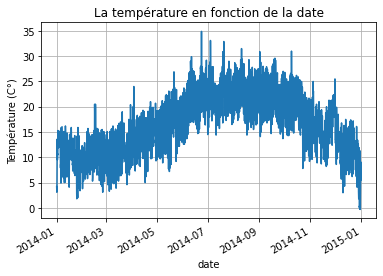

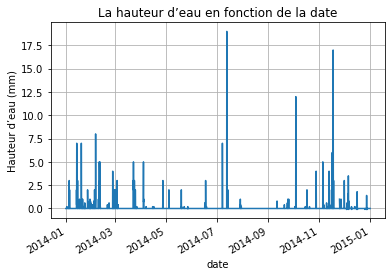

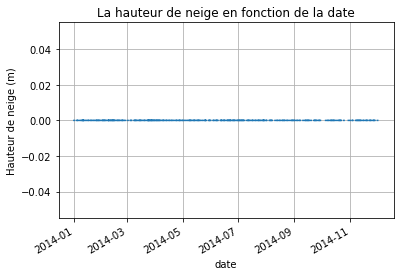

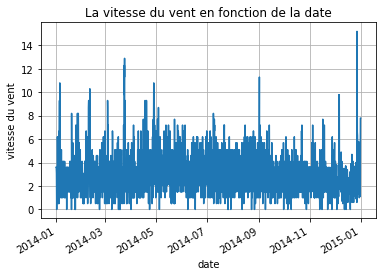

In [16]:
plt.figure()
data['temp'].plot()
plt.ylabel('Température (C°)')
plt.title('La température en fonction de la date')
plt.grid(True)
plt.savefig('tmp_date.png')

plt.figure()
data['pluie'].plot()
plt.ylabel('Hauteur d’eau (mm)')
plt.title('La hauteur d’eau en fonction de la date')
plt.grid(True)
plt.savefig('eau_date.png')
print(f"hauteur d’eau max={data['pluie'].max()} mm ({data['pluie'].idxmax()})")

plt.figure()
data['neige'].plot()
plt.ylabel('Hauteur de neige (m)')
plt.title('La hauteur de neige en fonction de la date')
plt.grid(True)
plt.savefig('neige_date.png')

plt.figure()
data['vent'].plot()
plt.ylabel('vitesse du vent')
plt.title('La vitesse du vent en fonction de la date')
plt.grid(True)
plt.savefig('vent_date.png')

## Calcul sur les données
### hauteur cumulée 
Calculer et afficher la hauteur cumulée sur un an de la hauteur d'eau et neige (avec les bonnes unités)
### Vitesse maximal du vent avec la date
Déterminer la vitesse du vent maximale et la date pour laquelle celle-ci est atteinte

In [17]:
print(f"Hauteur cumulée sur un an de la hauteur d'eau = {data['pluie'].sum()} mm")
print(f"Hauteur cumulée sur un an de la hauteur de neige = {data['neige'].sum()} m")
print(f"La vitesse du vent maximale = {data['vent'].max()} m/s ({data['vent'].idxmax()})")


Hauteur cumulée sur un an de la hauteur d'eau = 268.2 mm
Hauteur cumulée sur un an de la hauteur de neige = 0.0 m
La vitesse du vent maximale = 15.2 m/s (2014-12-27 15:00:00+00:00)


## Regroupement des données
Nous souhaitons dans cette partie analyser les donnees par mois. Nous representerons
les résultats sous la forme d’histogrammes.

### temperature moyenne par mois
- dans une variable **temperatures** calculer la température moyenne par mois indexer par le numéro du mois
- on tracera l'histogramme et on calculera la valeur min et max en affichant le mois

In [18]:
# ne pas modifier

La température moyenne max vaut 22.739919354838733 °C, pour le mois 8
La température moyenne min vaut 9.939024390243926 °C, pour le mois 1


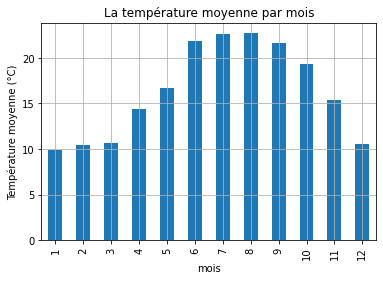

In [19]:
data['mois']=data.index.month
groupe=data.groupby('mois')
temperatures=groupe['temp'].mean()
temperatures.plot(kind='bar')
plt.grid(True)
plt.title('La température moyenne par mois')
plt.ylabel('Température moyenne (°C)')
plt.savefig('tmp_mois.png')
print(f"La température moyenne max vaut {temperatures.max()} °C, pour le mois {temperatures.idxmax()}")
print(f"La température moyenne min vaut {temperatures.min()} °C, pour le mois {temperatures.idxmin()}")

### hauteur d'eau cumulée par mois
- dans une variable **pluie** calculer la hauteur d'eau cumulée (avec la bonne unité) par mois indexée par le numero du mois
- on tracera l'histogramme et on calculer la valeur max (avec les bonnes unités)

La hauteur d'eau cumulée max vaut 62.1 mm, pour le mois 11
La hauteur d'eau cumulée min vaut 0.0 mm, pour le mois 8


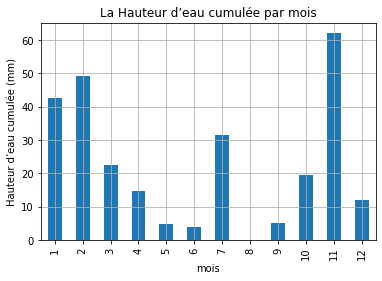

In [20]:
pluie=groupe['pluie'].sum()
pluie.plot(kind='bar')
plt.ylabel('Hauteur d’eau cumulée (mm)')
plt.title('La Hauteur d’eau cumulée par mois')
plt.grid(True)
plt.savefig('eau_mois.png')
print(f"La hauteur d'eau cumulée max vaut {pluie.max()} mm, pour le mois {pluie.idxmax()}")
print(f"La hauteur d'eau cumulée min vaut {pluie.min()} mm, pour le mois {pluie.idxmin()}")


In [21]:
# ne pas modifier

### Hauteur de neige cumulée par mois
- dans une variable **neige** calculer la hauteur de neige cumulée (avec la bonne unité) par mois indexée par le numero du mois
- on tracera l'histogramme et on calculer la valeur max

La hauteur de neige cumulée max vaut 0.0 m, pour le mois 1
La hauteur de neige cumulée min vaut 0.0 m, pour le mois 1


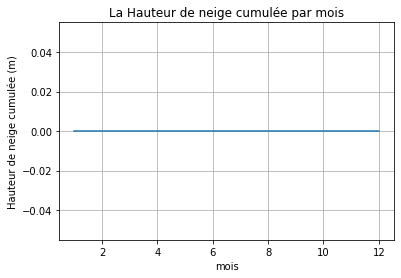

In [22]:
neige=groupe['neige'].sum()
plt.figure()
neige.plot()
plt.ylabel('Hauteur de neige cumulée (m)')
plt.title('La Hauteur de neige cumulée par mois')
plt.grid(True)
plt.savefig('neige_mois.png')
print(f"La hauteur de neige cumulée max vaut {neige.max()} m, pour le mois {neige.idxmax()}")
print(f"La hauteur de neige cumulée min vaut {neige.min()} m, pour le mois {neige.idxmin()}")

In [23]:
# ne pas modifier

### Comparaison avec la moyenne climatique
les normales climatiques entre 1981 et 2010 en France sont
répertoriées sur le site : 
- [http://www.lameteo.org/index.php/climatologie/normales-climatiques](http://www.lameteo.org/index.php/climatologie/normales-climatiques)

Les valeurs sont données pour chaque mois.

Tracer la normale climatique et la température moyenne par mois


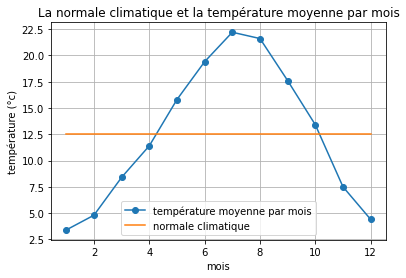

In [24]:
temp_moyenne=[3.4, 4.8, 8.4, 11.4, 15.8, 19.4, 22.2, 21.6, 17.6, 13.4, 7.5, 4.4]
normale_climatique=12.5*np.ones(12)
plt.figure()
plt.plot(neige.index, temp_moyenne,'-o',label='température moyenne par mois')
plt.plot(neige.index, normale_climatique,label='normale climatique')
plt.legend()
plt.title("La normale climatique et la température moyenne par mois")
plt.xlabel("mois")
plt.ylabel("température (°c)")
plt.grid(True)
plt.savefig('moyenne_climatique.png')

### Calcul du nbre de jours / mois ou T> Tmoy
- créer un dictionnaire **njours** qui pour chaque mois donne le nombre de jours où la température moyenne est au-dessus des normales climatiques. 
- le nom des mois est le suivant:

      "Jan.","Fev.","Mars","Avr.","Mai","Juin","Juil.","Aout","Sep.","Oct.","Nov.","Dec."
    
- On tracera le résultat sous la forme d'un histogramme



{'Jan.': 31, 'Fev.': 28, 'Mars': 31, 'Avr.': 30, 'Mai': 19, 'Juin': 25, 'Juil.': 20, 'Aout': 23, 'Sep.': 30, 'Oct.': 31, 'Nov.': 30, 'Dec.': 30}


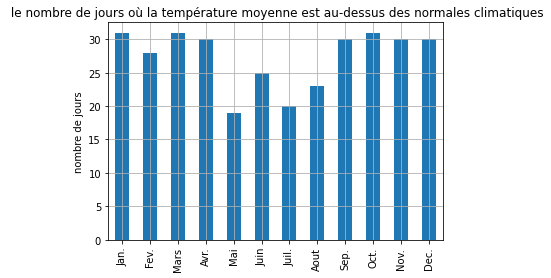

In [25]:
n=np.zeros(12)
data['jours']=data.index.day
njours={"Jan.":0,"Fev.":0,"Mars":0,"Avr.":0,"Mai":0,"Juin":0,"Juil.":0,"Aout":0,"Sep.":0,"Oct.":0,"Nov.":0,"Dec.":0}
l=list(njours.keys())
for i in range(1,13) :
    groupe1=groupe.get_group(i).groupby('jours')
    tm=groupe1['temp'].mean()
    nbr=0
    for t in tm :
        if t>temp_moyenne[i-1] :
            nbr+=1
    njours[l[i-1]]=nbr
print(njours)
data0=pd.Series(njours)
data0.plot(kind='bar')
plt.grid(True)
plt.title(" le nombre de jours où la température moyenne est au-dessus des normales climatiques")
plt.ylabel("nombre de jours")
plt.savefig('tmp_sup_mois.png')

In [26]:
# ne pas modifier

## Traitement des données
Nous souhaitons dans cette partie caracteriser la direction du vent par quadrants
(N,W,S,E).

- Creer une colonne **quad** indiquant pour chaque date la direction du vent par quadrant (on effectura la conversion de l'angle en degré / nord en direction 'N','W','S','E')

In [27]:
def fct_quad(x) :
    if x>=45 and x<135 :
        return 'E'
    if x>=135 and x<225 :
        return 'S'
    if x>=225 and x<315 :
        return 'W'
    if x>=315 or x<45 :
        return 'N'
data['quad']=data['dir'].apply(fct_quad)
data.head()

,temp,neige,pluie,dir,vent,mois,jours,quad
date,,,,,,,,
2014-02-28 21:00:00+00:00,8.6,NaN,0.6,330,1.0,2,28,N
2014-05-20 09:00:00+00:00,20.7,NaN,0.0,230,2.1,5,20,W
2014-03-12 03:00:00+00:00,5.7,NaN,0.0,50,3.1,3,12,E
2014-05-20 00:00:00+00:00,15.0,NaN,0.0,40,1.5,5,20,N
2014-09-29 06:00:00+00:00,13.7,0.0,0.0,40,3.1,9,29,N


In [28]:
# ne pas modifier

### calcul du nbre de jours en % sur l'année / direction du vent

Représenter sous la forme d’un histogramme, le pourcentage associé à chaque
direction du vent au cours de l’annee.

quad
E    34.373928
N    27.478559
S    17.358491
W    20.789022
Name: quad, dtype: float64


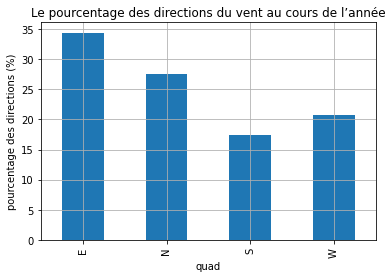

In [29]:
def nbr(x) :
    return len(x.dropna())
nombre=data.groupby('quad')['quad'].apply(nbr)
nombre_total=nbr(data['quad'])
pourcentage=nombre/nombre_total*100
print(pourcentage)
pourcentage.plot(kind='bar')
plt.grid(True)
plt.title("Le pourcentage des directions du vent au cours de l’année")
plt.ylabel("pourcentage des directions (%)") 
plt.savefig('dir_vent.png')

### Conclusion et Commentaire
Ecrire dans la cellule suivante votre commentaire sur cette analyse des données climatiques.

On utilisera pour cela la notation **markdown** avec le plan suivant

              ## Méthode
                décrire succintement l'objectif et la méthode d'analyse des résultats
              ## Analyse
                décrire l'analyse des résultats obtenus
              ## Conclusion
                 écrire votre conclusion

## Méthode

L’objectif de ce projet est d’analyser les relevés d’une station météo d’Ajaccio pendant l’année 2014.  
Pour cela, on a utilisé le langage **Python** et la bibliothèque **Pandas** afin de manipuler les données et réaliser des statistiques simples (moyennes, sommes, graphiques…).  

Dans un premier temps, on a lu le fichier de données et on l’a transformé en tableau DataFrame. On a sélectionné et renommé les colonnes utiles pour simplifier le traitement. Après on a convertie les dates à un objet datetime. Enfin, on a indexé le tableau par la date afin de faciliter l’analyse des données dans le temps.  

Ensuite, on a tracé les courbes de la température, des précipitations, de la neige et de la vitesse du vent pour visualiser leur évolution au cours de l’année. On a également calculé la hauteur totale de pluie et de neige ainsi que la vitesse maximale du vent et la date à laquelle elle a été atteinte.  

Puis, on a regroupé les données par mois pour calculer la température moyenne et la hauteur d’eau et de neige cumulée pour chaque mois. Après on a comparé la température moyenne aux normales climatiques observées entre 1981 et 2010. On a aussi compté le nombre de jours où la température moyenne dépassait la moyenne climatique mensuelle.  

Enfin, on a étudié la direction du vent en la transformant en quadrants (Nord, Est, Sud, Ouest), et on a tracé le pourcentage de vent provenant de chaque direction.


## Analyse

![Figure 1 : La température en fonction de la date](images/tmp_date.png)  

La figure montre que la température prend plusieurs valeurs pendant chaque mois, mais en général, elle augmente progressivement, après elle reste presque dans la même intervalle entre les mois de juin et d’octobre, puis elle diminue.


![Figure 5 : La température moyenne par mois](images/tmp_mois.png)  

Avec la figure des températures moyennes, on voit mieux la variation de la température selon les mois.  
La température moyenne atteint son minimum de **9,94 °C** en janvier, reste autour de 10 °C pendant les trois premiers mois, puis augmente progressivement jusqu’en juin.  
Elle se stabilise autour de 22 °C jusqu’au mois d’août où elle atteint son maximum de **22,74 °C**.  
Ensuite, elle diminue progressivement pour retrouver une valeur proche de 10 °C en décembre.


![Figure 8 : Les normales climatiques entre 1981 et 2010](images/moyenne_climatique.png)  

La figure montre les normales climatiques entre 1981 et 2010.  
On observe que la température est généralement au-dessus de la normale climatique de mai à octobre, et au-dessous pendant les autres mois.


![Figure 9 : Le nombre de jours où la température moyenne est au-dessus des normales climatiques](images/tmp_sup_mois.png)  

D’après la figure, on remarque que, pour presque tous les mois, plus de 15 jours présentent une température moyenne supérieure aux normales climatiques.  
Cela signifie que la température à Ajaccio est plus élevée que la normale climatique (1981–2010) la plupart du temps.  
De plus, en dehors de la période mai–août, la température est supérieure aux normales presque tous les jours.


![Figure 2 : La hauteur d’eau en fonction de la date](images/eau_date.png)  

La hauteur d’eau est, la plupart du temps, inférieure ou égale à 5 mm. Cependant, la courbe présente aussi des pics, par exemple un maximum de **19,0 mm** le 13 juillet 2014.  
La hauteur d’eau totale cumulée à Ajaccio pendant l’année 2014 est de **268,2 mm**.


![Figure 6 : La hauteur d’eau cumulée par mois](images/eau_mois.png)  

On voit que la hauteur d’eau cumulée est nulle en août, faible pendant les mois mai, juin et septembre, moyenne pendant les mois mars, avril, octobre et décembre, et importante en janvier, février et novembre où elle atteint un maximum de **62,1 mm**.  
Cependant, il est étrange que la hauteur d’eau en juillet est élevée, présentant un pic pendant les mois d’été.


![Figure 3 : La hauteur de neige en fonction de la date](images/neige_date.png)  
![Figure 7 : La hauteur de neige cumulée par mois](images/neige_mois.png)  

Les deux figures montrent que la hauteur de neige reste toujours nulle à Ajaccio en 2014.


![Figure 4 : La vitesse du vent en fonction de la date](images/vent_date.png)  

La vitesse du vent est, la plupart du temps, inférieure à **8 m/s**, sauf lors de quelques pics, comme celui du 27 décembre 2014 à 15h00, où la vitesse du vent a atteint **15,2 m/s**.


![Figure 10 : Le pourcentage des directions du vent au cours de l’année 2014](images/dir_vent.png) 

La figure montre la répartition des directions du vent pendant l’année 2014.  
On voit que le vent vient le plus souvent de l’Est avec environ **34 %** du temps.  
Ensuite vient le Nord avec environ **27 %**, puis l’Ouest avec environ **21 %**, et enfin le Sud avec environ **17 %**. 

## Conclusion

Dans ce TP, on a utilisé la bibliothèque Pandas pour lire les données météo d’Ajaccio en 2014 et les transformer en DataFrame. Ce travail m’a permis de manipuler le temps, modifier et ajouter des données, appliquer des fonctions sur le DataFrame, regrouper les données, créer des Series et tracer des graphiques.  

Grâce à ces analyses, on a pu visualiser les variations de température, de précipitations, de neige et de vent, et comparer les températures avec les normales climatiques.

## FIN